In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# An Introduction To computational Learning Theory

## 1. The Probably Approximately Correct Learning Model

### 1.1 A Rectangular Learning Game

In [2]:
def plot_rectangle(ax, anchor, width, height, color='k', alpha=0.5):
    """
    Plot a rectangle on the given axis.
    """
    rect = Rectangle(anchor, width, height,
                     facecolor=color, alpha=alpha)
    ax.add_patch(rect)

In [3]:
def fit_rectangle(X, y, ec='black', alpha=.1) -> Rectangle:
    """
    Fit a rectangle to the given data.
    """
    h_min = X[y].min(axis=0)
    h_max = X[y].max(axis=0)
    return Rectangle(h_min, *(h_max - h_min), edgecolor=ec, alpha=alpha)

    

FileNotFoundError: [Errno 2] No such file or directory: '../assets/images/traget-and-sample.pdf'

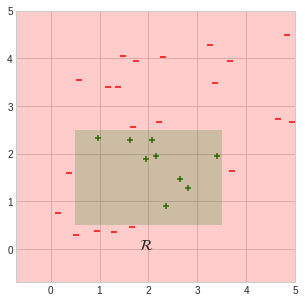

In [8]:
# Setup (plane and unknown rectangle)
anchor = np.array([.5, .5])
width = 3
height = 2
np.random.seed(69)
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.set_xlim([-.7, 5])
ax.set_ylim([-.7, 5])
# # set the x-spine (see below for more info on `set_position`)
# ax.spines['left'].set_position('zero')

# # turn off the right spine/ticks
# ax.spines['right'].set_color('none')
# ax.yaxis.tick_left()

# # set the y-spine
# ax.spines['bottom'].set_position('zero')

# # turn off the top spine/ticks
# ax.spines['top'].set_color('none')
# ax.xaxis.tick_bottom()
plane = Rectangle(
    (-.7, -.7), 
    ax.get_xlim()[1] - ax.get_xlim()[0], ax.get_ylim()[1] - ax.get_ylim()[0],facecolor='red', alpha=0.2
)
unknown = Rectangle(anchor, width, height, facecolor='green', alpha=0.2)
ax.add_patch(plane)
ax.add_patch(unknown)
ax.text(width/2+anchor[0] -.2, anchor[1]-.5, r"$\mathcal{R}$", fontsize=15)

# Draw N X colored based on their location
N = 30
X = np.random.rand(N, 2) * 5
y = (anchor[0] < X[:, 0]) &\
(X[:, 0] < anchor[0] + width)       &\
(anchor[1] < X[:, 1])               &\
(X[:, 1] < anchor[1] + height)
for i, point in enumerate(X):
    ax.scatter(point[0], point[1], c='green' if y[i] else 'red', marker='+' if y[i] else '_')
plt.savefig('../assets/images/traget-and-sample.pdf')

# plot hypothesis triangle
h_min = X[y].min(axis=0)
h_max = X[y].max(axis=0)

hypothesis = fit_rectangle(X, y)
ax.add_patch(hypothesis)
ax.text(((h_min + h_max)/2)[0], h_min[1]-.3, r"$\mathcal{R}^\prime$", fontsize=15)

plt.savefig('../assets/images/traget-hypothesis-and-sample.pdf')

plt.show()